This is the capstone in the course of "Business Statistics and Analysis" with Rice University.

<b>The main goal of this capstone is to study housing affordability relative to Median income, Poverty level income, and Fair market rent.</b>

Datasets are based on American Housing Survey (AHS) national files from 1985 onwards.

This capstone will have 2 versions, this is the second version was analyzed using Jupyter Notebook. At the end, we will use Machine Learning model to run the prediction for 2015.

By the instruction, the dataset can also be downloaded it over: [https://www.huduser.gov/portal/datasets/hads/hads.html](https://www.huduser.gov/portal/datasets/hads/hads.html)

*The Housing Affordability Data System (HADS) is a set of files derived from the 1985 and later national American Housing Survey (AHS) and the 2002 and later Metro AHS. This system categorizes housing units by affordability and households by income, with respect to the Adjusted Median Income, Fair Market Rent (FMR), and poverty income. It also includes housing cost burden for owner and renter households. These files have been the basis for the worst case needs tables since 2001. The data files are available for public use, since they were derived from AHS public use files and the published income limits and FMRs. We are providing these files give the community of housing analysts the opportunity to use a consistent set of affordability measures.*

<b>Table of Content</b>
1. [Assignment 1: Differences in Market Value of Housing Units](#1)
1. [Assignment 2: Fair Market Rent of Housing Units](#2)
1. [Assignment 3: A Model for Market Value of Single Family Housing Units in year of 2013](#3)
1. [Assignment 4: Building a Predictive Model for Market Value of Housing Units: Using the regression model to predict market value two years (2013 and 2011)](#4)
1. [Assignment 5: (Machine Learning Practice) Building a Predictive Model for Market Value of Housing Units: Using the Machine Learning regression model to predict market value for 2015 (PLACEHOLDER)](#5)


<a id="1"></a> <br>
<font color='blue'><h4><b>Assignment 1: Differences in Market Value of Housing Units

<h4><b>Questions:
    
    
Q1: Are there difference in the Market Value of occupied versus vacant housing units?
    
    
Q2: Is there a pattern in these differences over the periods 2005 through 2013?</b></h4>
[Jump to the answers](#1.1)


In [1]:
import pandas as pd

five_df = pd.read_csv('../input/housing-affordability-data/thads2005.csv')
seven_df = pd.read_csv('../input/housing-affordability-data/thads2007.csv')
nine_df = pd.read_csv('../input/housing-affordability-data/thads2009.csv')
eleven_df = pd.read_csv('../input/housing-affordability-data/thads2011.csv')
thirteen_df = pd.read_csv('../input/housing-affordability-data/thads2013n.csv')

In [2]:
five_df.columns

Index(['CONTROL', 'AGE1', 'BEDRMS', 'PER', 'REGION', 'LMED', 'FMR', 'L30',
       'L50', 'L80', 'IPOV', 'BUILT', 'STATUS', 'VACANCY', 'TENURE', 'NUNITS',
       'TYPE', 'VALUE', 'ZINC2', 'ROOMS', 'ZADEQ', 'ZSMHC', 'WEIGHT', 'METRO3',
       'STRUCTURETYPE', 'OWNRENT', 'UTILITY', 'OTHERCOST', 'COST06', 'COST12',
       'COST08', 'COSTMED', 'TOTSAL', 'ASSISTED', 'GLMED', 'GL30', 'GL50',
       'GL80', 'APLMED', 'ABL30', 'ABL50', 'ABL80', 'ABLMED', 'BURDEN',
       'INCRELAMIPCT', 'INCRELAMICAT', 'INCRELPOVPCT', 'INCRELPOVCAT',
       'INCRELFMRPCT', 'INCRELFMRCAT', 'COST06RELAMIPCT', 'COST06RELAMICAT',
       'COST06RELPOVPCT', 'COST06RELPOVCAT', 'COST06RELFMRPCT',
       'COST06RELFMRCAT', 'COST08RELAMIPCT', 'COST08RELAMICAT',
       'COST08RELPOVPCT', 'COST08RELPOVCAT', 'COST08RELFMRPCT',
       'COST08RELFMRCAT', 'COST12RELAMIPCT', 'COST12RELAMICAT',
       'COST12RELPOVPCT', 'COST12RELPOVCAT', 'COST12RELFMRPCT',
       'COST12RELFMRCAT', 'COSTMedRELAMIPCT', 'COSTMedRELAMICAT',
      

In [3]:
# Filter columns
five_value = five_df[['CONTROL','VALUE','STATUS']]
seven_value = seven_df[['CONTROL','VALUE','STATUS']]
nine_value = nine_df[['CONTROL','VALUE','STATUS']]
eleven_value = eleven_df[['CONTROL','VALUE','STATUS']]
thirteen_value = thirteen_df[['CONTROL','VALUE','STATUS']]

In [4]:
five_value = five_value[(five_value['VALUE'] >= 1000)]

In [5]:
# Split Dataframe apply groupby() on multiple columns 
five_value = five_value.groupby("STATUS")
print("STATUS 1 3 meaning Occupied and Vacant housing units.")
print('\033[1m' +"In 2005, the mean value of Occupied houses and Vacant houses is:"  + '\033[0m')
print(five_value.mean())
print('\033[1m' +"In 2005, the median value of Occupied houses and Vacant houses is:"+ '\033[0m')
print(five_value.median())
print('\033[1m' +"In 2005, the standard deviation of value for Occupied houses and Vacant houses is:"+ '\033[0m')
print(five_value.std())
print('\033[1m' +"In 2005, the maximum value of Occupied houses and Vacant houses is:"+ '\033[0m')
print(five_value.max())
print('\033[1m' +"In 2005, the minimum value of Occupied houses and Vacant houses is:"+ '\033[0m')
print(five_value.min())
print('\033[1m' +"In 2005, the sum value of Occupied houses and Vacant houses is:"+ '\033[0m')
print(five_value.sum())
print('\033[1m' +"In 2005, the total counts of Occupied houses and Vacant houses is:"+ '\033[0m')
print(five_value.count())

STATUS 1 3 meaning Occupied and Vacant housing units.
In 2005, the mean value of Occupied houses and Vacant houses is:
                VALUE
STATUS               
'1'     247130.846637
'3'     229324.359404
In 2005, the median value of Occupied houses and Vacant houses is:
           VALUE
STATUS          
'1'     160000.0
'3'     150000.0
In 2005, the standard deviation of value for Occupied houses and Vacant houses is:
                VALUE
STATUS               
'1'     281859.640451
'3'     264371.483363
In 2005, the maximum value of Occupied houses and Vacant houses is:
               CONTROL    VALUE
STATUS                         
'1'     '747730090144'  1540794
'3'     '744548420245'  1540794
In 2005, the minimum value of Occupied houses and Vacant houses is:
               CONTROL  VALUE
STATUS                       
'1'     '100006110249'   1000
'3'     '100029330103'   1200
In 2005, the sum value of Occupied houses and Vacant houses is:
             VALUE
STATUS            
'

In [6]:
seven_value = seven_value[(seven_value['VALUE'] >= 1000)]

In [7]:
# Split Dataframe apply groupby() on multiple columns 
seven_value = seven_value.groupby("STATUS")
print("STATUS 1 3 meaning Occupied and Vacant housing units.")
print('\033[1m' +"In 2007, the mean value of Occupied houses and Vacant houses is:"  + '\033[0m')
print(seven_value.mean())
print('\033[1m' +"In 2007, the median value of Occupied houses and Vacant houses is:"+ '\033[0m')
print(seven_value.median())
print('\033[1m' +"In 2007, the standard deviation of value for Occupied houses and Vacant houses is:"+ '\033[0m')
print(seven_value.std())
print('\033[1m' +"In 2007, the maximum value of Occupied houses and Vacant houses is:"+ '\033[0m')
print(seven_value.max())
print('\033[1m' +"In 2007, the minimum value of Occupied houses and Vacant houses is:"+ '\033[0m')
print(seven_value.min())
print('\033[1m' +"In 2007, the sum value of Occupied houses and Vacant houses is:"+ '\033[0m')
print(seven_value.sum())
print('\033[1m' +"In 2007, the total counts of Occupied houses and Vacant houses is:"+ '\033[0m')
print(seven_value.count())

STATUS 1 3 meaning Occupied and Vacant housing units.
In 2007, the mean value of Occupied houses and Vacant houses is:
                VALUE
STATUS               
'1'     278960.753344
'3'     289004.492798
In 2007, the median value of Occupied houses and Vacant houses is:
           VALUE
STATUS          
'1'     190000.0
'3'     200000.0
In 2007, the standard deviation of value for Occupied houses and Vacant houses is:
                VALUE
STATUS               
'1'     317162.765876
'3'     306203.818010
In 2007, the maximum value of Occupied houses and Vacant houses is:
               CONTROL    VALUE
STATUS                         
'1'     '747730090144'  1829479
'3'     '746548140148'  1829479
In 2007, the minimum value of Occupied houses and Vacant houses is:
               CONTROL  VALUE
STATUS                       
'1'     '100006110249'   1000
'3'     '100003130103'   1000
In 2007, the sum value of Occupied houses and Vacant houses is:
             VALUE
STATUS            
'

In [8]:
nine_value = nine_value[(nine_value['VALUE'] >= 1000)]

In [9]:
# Split Dataframe apply groupby() on multiple columns 
nine_value = nine_value.groupby("STATUS")
print("STATUS 1 3 meaning Occupied and Vacant housing units.")
print('\033[1m' +"In 2009, the mean value of Occupied houses and Vacant houses is:"  + '\033[0m')
print(nine_value.mean())
print('\033[1m' +"In 2009, the median value of Occupied houses and Vacant houses is:"+ '\033[0m')
print(nine_value.median())
print('\033[1m' +"In 2009, the standard deviation of value for Occupied houses and Vacant houses is:"+ '\033[0m')
print(nine_value.std())
print('\033[1m' +"In 2009, the maximum value of Occupied houses and Vacant houses is:"+ '\033[0m')
print(nine_value.max())
print('\033[1m' +"In 2009, the minimum value of Occupied houses and Vacant houses is:"+ '\033[0m')
print(nine_value.min())
print('\033[1m' +"In 2009, the sum value of Occupied houses and Vacant houses is:"+ '\033[0m')
print(nine_value.sum())
print('\033[1m' +"In 2009, the total counts of Occupied houses and Vacant houses is:"+ '\033[0m')
print(nine_value.count())

STATUS 1 3 meaning Occupied and Vacant housing units.
In 2009, the mean value of Occupied houses and Vacant houses is:
                VALUE
STATUS               
'1'     247681.966291
'3'     249230.060680
In 2009, the median value of Occupied houses and Vacant houses is:
           VALUE
STATUS          
'1'     179000.0
'3'     165000.0
In 2009, the standard deviation of value for Occupied houses and Vacant houses is:
                VALUE
STATUS               
'1'     273625.741921
'3'     318104.853020
In 2009, the maximum value of Occupied houses and Vacant houses is:
               CONTROL    VALUE
STATUS                         
'1'     '747730090144'  2465647
'3'     '746548140148'  2465647
In 2009, the minimum value of Occupied houses and Vacant houses is:
               CONTROL  VALUE
STATUS                       
'1'     '100003130103'   1000
'3'     '100029430103'   1000
In 2009, the sum value of Occupied houses and Vacant houses is:
             VALUE
STATUS            
'

In [10]:
eleven_value = eleven_value[(eleven_value['VALUE'] >= 1000)]

In [11]:
# Split Dataframe apply groupby() on multiple columns 
eleven_value = eleven_value.groupby("STATUS")
print("STATUS 1 3 meaning Occupied and Vacant housing units.")
print('\033[1m' +"In 2011, the mean value of Occupied houses and Vacant houses is:"  + '\033[0m')
print(eleven_value.mean())
print('\033[1m' +"In 2011, the median value of Occupied houses and Vacant houses is:"+ '\033[0m')
print(eleven_value.median())
print('\033[1m' +"In 2011, the standard deviation of value for Occupied houses and Vacant houses is:"+ '\033[0m')
print(eleven_value.std())
print('\033[1m' +"In 2011, the maximum value of Occupied houses and Vacant houses is:"+ '\033[0m')
print(eleven_value.max())
print('\033[1m' +"In 2011, the minimum value of Occupied houses and Vacant houses is:"+ '\033[0m')
print(eleven_value.min())
print('\033[1m' +"In 2011, the sum value of Occupied houses and Vacant houses is:"+ '\033[0m')
print(eleven_value.sum())
print('\033[1m' +"In 2011, the total counts of Occupied houses and Vacant houses is:"+ '\033[0m')
print(eleven_value.count())

STATUS 1 3 meaning Occupied and Vacant housing units.
In 2011, the mean value of Occupied houses and Vacant houses is:
                VALUE
STATUS               
'1'     258136.221119
'3'     222116.854980
In 2011, the median value of Occupied houses and Vacant houses is:
           VALUE
STATUS          
'1'     177000.0
'3'     144450.0
In 2011, the standard deviation of value for Occupied houses and Vacant houses is:
                VALUE
STATUS               
'1'     301001.861815
'3'     316336.878644
In 2011, the maximum value of Occupied houses and Vacant houses is:
               CONTROL    VALUE
STATUS                         
'1'     '999900022231'  5264699
'3'     '999900022154'  4414135
In 2011, the minimum value of Occupied houses and Vacant houses is:
               CONTROL  VALUE
STATUS                       
'1'     '036000001146'   1000
'3'     '036000001160'   1000
In 2011, the sum value of Occupied houses and Vacant houses is:
              VALUE
STATUS             

In [12]:
thirteen_value = thirteen_value[(thirteen_value['VALUE'] >= 1000)]

In [13]:
# Split Dataframe apply groupby() on multiple columns 
thirteen_value = thirteen_value.groupby("STATUS")
print("STATUS 1 3 meaning Occupied and Vacant housing units.")
print('\033[1m' +"In 2013, the mean value of Occupied houses and Vacant houses is:"  + '\033[0m')
print(thirteen_value.mean())
print('\033[1m' +"In 2013, the median value of Occupied houses and Vacant houses is:"+ '\033[0m')
print(thirteen_value.median())
print('\033[1m' +"In 2013, the standard deviation of value for Occupied houses and Vacant houses is:"+ '\033[0m')
print(thirteen_value.std())
print('\033[1m' +"In 2013, the maximum value of Occupied houses and Vacant houses is:"+ '\033[0m')
print(thirteen_value.max())
print('\033[1m' +"In 2013, the minimum value of Occupied houses and Vacant houses is:"+ '\033[0m')
print(thirteen_value.min())
print('\033[1m' +"In 2013, the sum value of Occupied houses and Vacant houses is:"+ '\033[0m')
print(thirteen_value.sum())
print('\033[1m' +"In 2013, the total counts of Occupied houses and Vacant houses is:"+ '\033[0m')
print(thirteen_value.count())

STATUS 1 3 meaning Occupied and Vacant housing units.
In 2013, the mean value of Occupied houses and Vacant houses is:
                VALUE
STATUS               
'1'     249858.546502
'3'     251996.817820
In 2013, the median value of Occupied houses and Vacant houses is:
           VALUE
STATUS          
'1'     180000.0
'3'     150000.0
In 2013, the standard deviation of value for Occupied houses and Vacant houses is:
                VALUE
STATUS               
'1'     282290.645148
'3'     389653.087569
In 2013, the maximum value of Occupied houses and Vacant houses is:
               CONTROL    VALUE
STATUS                         
'1'     '999900056763'  2520000
'3'     '999900052327'  2520000
In 2013, the minimum value of Occupied houses and Vacant houses is:
               CONTROL  VALUE
STATUS                       
'1'     '100003130103'  10000
'3'     '100144130103'  10000
In 2013, the sum value of Occupied houses and Vacant houses is:
             VALUE
STATUS            
'

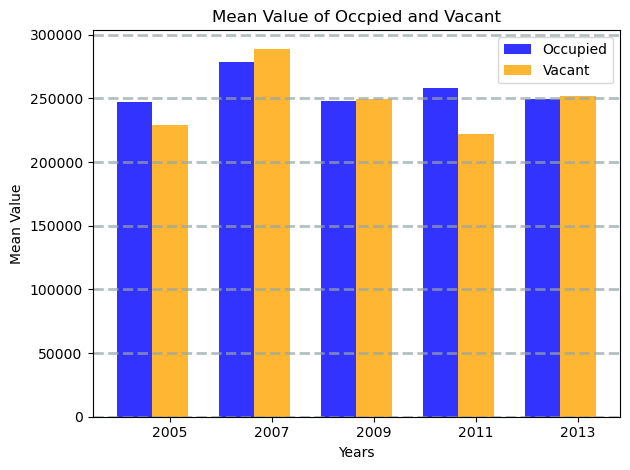

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 5
means_occupied = (247131, 278961, 247682, 258136,249859)
means_vacant = (229324,289004,249230,222117,251997)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_occupied, bar_width,
alpha=opacity,
color='b',
label='Occupied')

rects2 = plt.bar(index + bar_width, means_vacant, bar_width,
alpha=opacity,
color='orange',
label='Vacant')

plt.xlabel('Years')
plt.ylabel('Mean Value')
plt.title('Mean Value of Occpied and Vacant')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(index + bar_width, ('2005', '2007', '2009', '2011', '2013'))
plt.legend()

plt.tight_layout()
plt.show()

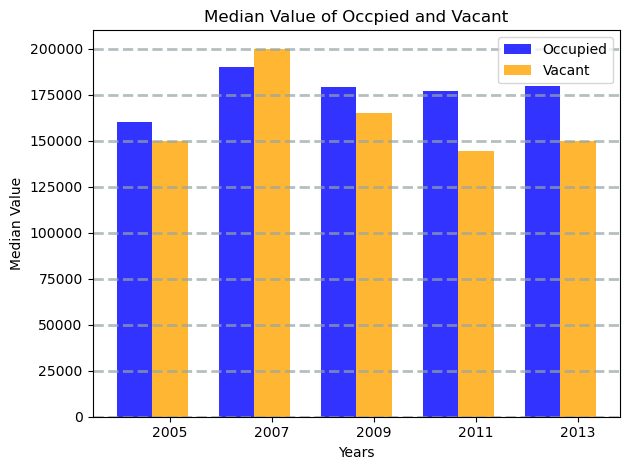

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 5
median_occupied = (160000,190000,179000,177000,180000)
median_vacant = (150000,200000,165000,144450,150000)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, median_occupied, bar_width,
alpha=opacity,
color='b',
label='Occupied')

rects2 = plt.bar(index + bar_width, median_vacant, bar_width,
alpha=opacity,
color='orange',
label='Vacant')

plt.xlabel('Years')
plt.ylabel('Median Value')
plt.title('Median Value of Occpied and Vacant')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(index + bar_width, ('2005', '2007', '2009', '2011', '2013'))
plt.legend()

plt.tight_layout()
plt.show()

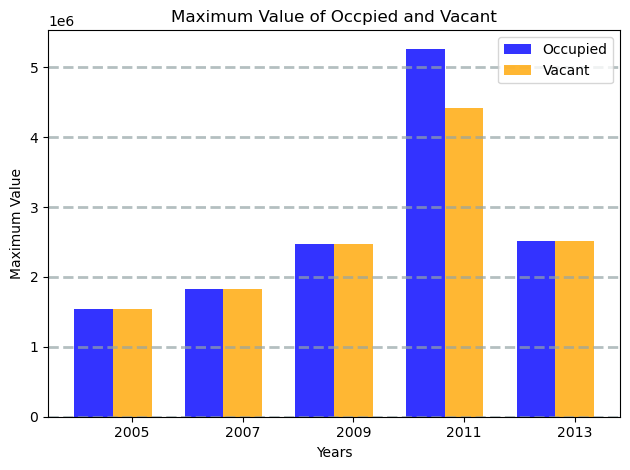

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 5
max_occupied = (1540794,1829479,2465647,5264699,2520000)
max_vacant = (1540794,1829479,2465647,4414135,2520000)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, max_occupied, bar_width,
alpha=opacity,
color='b',
label='Occupied')

rects2 = plt.bar(index + bar_width, max_vacant, bar_width,
alpha=opacity,
color='orange',
label='Vacant')

plt.xlabel('Years')
plt.ylabel('Maximum Value')
plt.title('Maximum Value of Occpied and Vacant')
plt.xticks(index + bar_width, ('2005', '2007', '2009', '2011', '2013'))
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

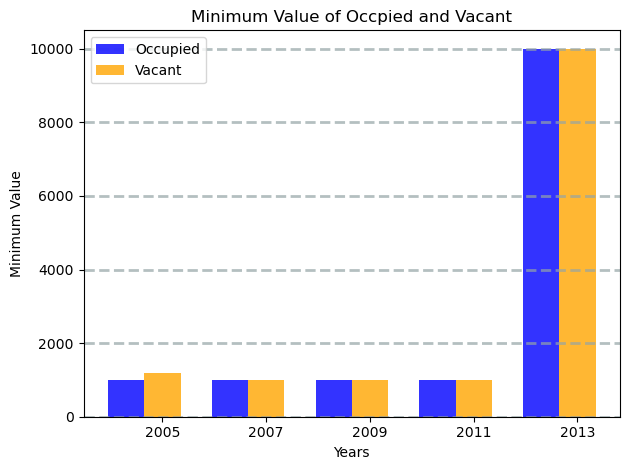

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 5
min_occupied = (1000,1000,1000,1000,10000)
min_vacant = (1200,1000,1000,1000,10000)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, min_occupied, bar_width,
alpha=opacity,
color='b',
label='Occupied')

rects2 = plt.bar(index + bar_width, min_vacant, bar_width,
alpha=opacity,
color='orange',
label='Vacant')

plt.xlabel('Years')
plt.ylabel('Minimum Value')
plt.title('Minimum Value of Occpied and Vacant')
plt.xticks(index + bar_width, ('2005', '2007', '2009', '2011', '2013'))
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

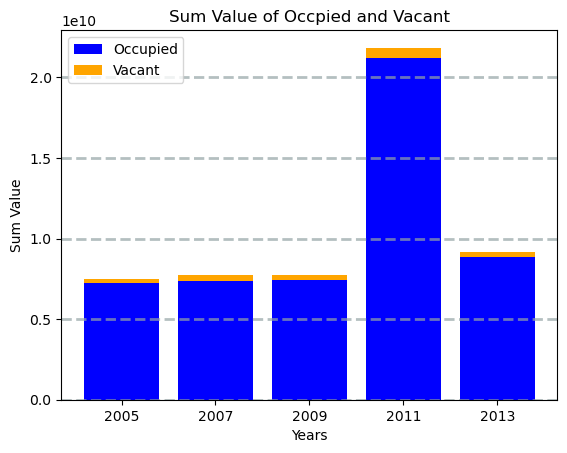

In [18]:
# load matplotlib
import matplotlib.pyplot as plt

# data set
years = ['2005', '2007', '2009', '2011','2013']
sum_occupied = [7275532125,7382975298,7450521228,21187304757,8849490000]
sum_vacant = [246294362,381196926,308048355,660131293,316760000]


# plot stacked bar chart 
plt.bar(years, sum_occupied, color='b',label = "Occupied")
plt.bar(years, sum_vacant, bottom=sum_occupied, color='orange',label = "Vacant")
plt.xlabel('Years')
plt.ylabel('Sum Value')
plt.title('Sum Value of Occpied and Vacant')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.legend(loc="upper left")
plt.show()

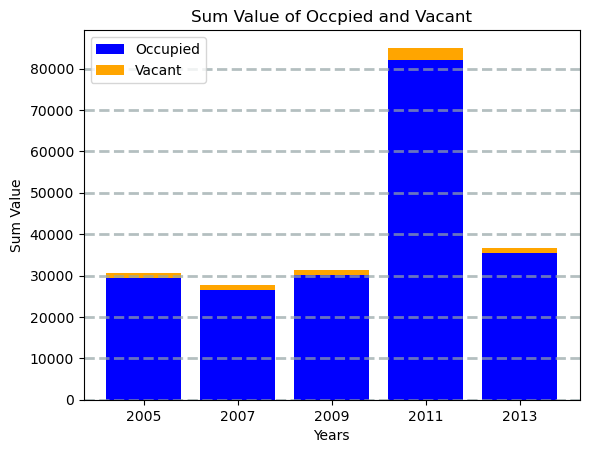

In [19]:
# load matplotlib
import matplotlib.pyplot as plt

# data set
years = ['2005', '2007', '2009', '2011','2013']
count_occupied = [29440,26466,30081,82078,35418]
count_vacant = [1074,1319,1236,2972,1257]


# plot stacked bar chart 
plt.bar(years, count_occupied, color='b',label = "Occupied")
plt.bar(years, count_vacant, bottom=count_occupied, color='orange',label = "Vacant")
plt.xlabel('Years')
plt.ylabel('Sum Value')
plt.title('Sum Value of Occpied and Vacant')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.legend(loc="upper left")
plt.show()

<h4><b>Different years of t-Test:

Two-sample t-test for year of 2005

In [20]:
# First we return all necessary numbers together
print(five_value.mean())
print(five_value.std())
print(five_value.count())

                VALUE
STATUS               
'1'     247130.846637
'3'     229324.359404
                VALUE
STATUS               
'1'     281859.640451
'3'     264371.483363
        CONTROL  VALUE
STATUS                
'1'       29440  29440
'3'        1074   1074


In [21]:
import numpy as np
# Import math Library
import math

# unknown population mean 

# Calculate the mean and standard error
five_occupied_mean = 247130.846637
five_vacant_mean = 229324.359404
five_occupied_std = 281859.640451
five_vacant_std = 264371.483363
five_occupied_count = 29440
five_vacant_count = 1074


In [22]:
# This is the difference between two average
five_mean_t = five_occupied_mean - five_vacant_mean
print(five_mean_t)

17806.48723300002


In [23]:
# We calculate the pooled standard deviation, but first we calculate the pooled variance
five_pool_var = ((five_occupied_count - 1)* five_occupied_std**2 + (five_vacant_count - 1)* five_vacant_std**2)/five_occupied_count+five_vacant_count-2
print(five_pool_var)
# get solution of square root of the pooled variance to get the pooled standard deviation
five_pool_std = math.sqrt(five_pool_var)
print(five_pool_std)

81989524185.78702
286338.12911623734


In [24]:
# calculate t statistics
# t-stat = difference of the averages/ (pooled standard deviation * math.sqrt(1/sample size 1 + 1/sample size 2))
five_t = five_mean_t / (five_pool_std * math.sqrt(1/five_occupied_count + 1/five_vacant_count))
print("t-Stat for year of 2005 is: ", five_t)
five_degree_freedom = five_occupied_count + five_vacant_count - 2
print("df for year of 2005 is:", five_degree_freedom)

t-Stat for year of 2005 is:  2.0017993421760725
df for year of 2005 is: 30512


In [25]:
# We can also run an unequal t-test
# t = (sample 1 mean - sample 2 mean)/math.sqrt((std 1**2/sample size1)+(std 2**2/sample size2))
five_unequal_t=(five_occupied_mean - five_vacant_mean)/math.sqrt((five_occupied_std**2/five_occupied_count) + (five_vacant_std**2 /five_vacant_count))
print("t-Stat for year of 2007 is:", five_unequal_t)

t-Stat for year of 2007 is: 2.1629327683816495


Two-sample t-test for year of 2007

In [26]:
# First we return all necessary numbers together
print(seven_value.mean())
print(seven_value.std())
print(seven_value.count())

                VALUE
STATUS               
'1'     278960.753344
'3'     289004.492798
                VALUE
STATUS               
'1'     317162.765876
'3'     306203.818010
        CONTROL  VALUE
STATUS                
'1'       26466  26466
'3'        1319   1319


In [27]:
import numpy as np
# Import math Library
import math

# unknown population mean 

# Calculate the mean and standard error
seven_occupied_mean = 278960.753344
seven_vacant_mean = 289004.492798
seven_occupied_std = 317162.765876
seven_vacant_std = 306203.818010
seven_occupied_count = 26466
seven_vacant_count = 1319


In [28]:
# This is the difference between two average
seven_mean_t = seven_occupied_mean - seven_vacant_mean
print(seven_mean_t)

-10043.739453999966


In [29]:
# We calculate the pooled standard deviation, but first we calculate the pooled variance
seven_pool_var = ((seven_occupied_count - 1)* seven_occupied_std**2 + (seven_vacant_count - 1)* seven_vacant_std**2)/seven_occupied_count + seven_vacant_count-2
print(seven_pool_var)
# get solution of square root of the pooled variance to get the pooled standard deviation
seven_pool_std = math.sqrt(seven_pool_var)
print(seven_pool_std)

105257683228.05641
324434.40512383456


In [30]:
# calculate t statistics
# t-stat = difference of the averages/ (pooled standard deviation * math.sqrt(1/sample size 1 + 1/sample size 2))
seven_t = seven_mean_t / (seven_pool_std * math.sqrt(1/seven_occupied_count + 1/seven_vacant_count))
print("t-Stat for year of 2007 is: ", seven_t)
seven_degree_freedom = seven_occupied_count + seven_vacant_count - 2
print("df for year of 2007 is:", seven_degree_freedom)

t-Stat for year of 2007 is:  -1.0973113870863331
df for year of 2007 is: 27783


In [31]:
# We can also run an unequal t-test
# t = (sample 1 mean - sample 2 mean)/math.sqrt((std 1**2/sample size1)+(std 2**2/sample size2))
seven_unequal_t=(seven_occupied_mean - seven_vacant_mean)/math.sqrt((seven_occupied_std**2/seven_occupied_count) + (seven_vacant_std**2 /seven_vacant_count))
print("t-Stat for year of 2007 is:", seven_unequal_t)

t-Stat for year of 2007 is: -1.1606370088838551


Two-sample t-test for year of 2007

In [32]:
print(nine_value.mean())
print(nine_value.std())
print(nine_value.count())

                VALUE
STATUS               
'1'     247681.966291
'3'     249230.060680
                VALUE
STATUS               
'1'     273625.741921
'3'     318104.853020
        CONTROL  VALUE
STATUS                
'1'       30081  30081
'3'        1236   1236


In [33]:
import numpy as np
# Import math Library
import math

# unknown population mean 

# Calculate the mean and standard error
nine_occupied_mean = 247681.966291
nine_vacant_mean = 249230.060680
nine_occupied_std = 273625.741921
nine_vacant_std = 318104.853020
nine_occupied_count = 20081
nine_vacant_count = 1236


In [34]:
# This is the difference between two average
nine_mean_t = nine_occupied_mean - nine_vacant_mean
print(nine_mean_t)
# We calculate the pooled standard deviation, but first we calculate the pooled variance
nine_pool_var = ((nine_occupied_count - 1)* nine_occupied_std**2 + (nine_vacant_count - 1)* nine_vacant_std**2)/nine_occupied_count + nine_vacant_count-2
print(nine_pool_var)
# get solution of square root of the pooled variance to get the pooled standard deviation
nine_pool_std = math.sqrt(nine_pool_var)
print(nine_pool_std)

-1548.0943890000053
81090640544.72014
284764.18409750925


In [35]:
# calculate t statistics
# t-stat = difference of the averages/ (pooled standard deviation * math.sqrt(1/sample size 1 + 1/sample size 2))
nine_t = nine_mean_t / (nine_pool_std * math.sqrt(1/nine_occupied_count + 1/nine_vacant_count))
print("t-Stat for year of 2009 is: ", nine_t)
nine_degree_freedom = nine_occupied_count + nine_vacant_count - 2
print("df for year of 2009 is:", nine_degree_freedom)

t-Stat for year of 2009 is:  -0.18550299760737562
df for year of 2009 is: 21315


In [36]:
# We can also run an unequal t-test
# t = (sample 1 mean - sample 2 mean)/math.sqrt((std 1**2/sample size1)+(std 2**2/sample size2))
nine_unequal_t=(nine_occupied_mean - nine_vacant_mean)/math.sqrt((nine_occupied_std**2/nine_occupied_count) + (nine_vacant_std**2 /nine_vacant_count))
print("t-Stat for year of 2009 is:", nine_unequal_t)

t-Stat for year of 2009 is: -0.1673268974599187


Two-sample t-test for year of 2011

In [37]:
print(eleven_value.mean())
print(eleven_value.std())
print(eleven_value.count())

                VALUE
STATUS               
'1'     258136.221119
'3'     222116.854980
                VALUE
STATUS               
'1'     301001.861815
'3'     316336.878644
        CONTROL  VALUE
STATUS                
'1'       82078  82078
'3'        2972   2972


In [38]:
import numpy as np
# Import math Library
import math

# unknown population mean 

# Calculate the mean and standard error
eleven_occupied_mean = 258136.221119
eleven_vacant_mean = 222116.854980
eleven_occupied_std = 301001.861815
eleven_vacant_std = 316336.878644
eleven_occupied_count = 82078
eleven_vacant_count = 2972


In [39]:
# This is the difference between two average
eleven_mean_t = eleven_occupied_mean - eleven_vacant_mean
print(eleven_mean_t)
# We calculate the pooled standard deviation, but first we calculate the pooled variance
eleven_pool_var = ((eleven_occupied_count - 1)* eleven_occupied_std**2 + (eleven_vacant_count - 1)* eleven_vacant_std**2)/eleven_occupied_count + eleven_vacant_count-2
print(eleven_pool_var)
# get solution of square root of the pooled variance to get the pooled standard deviation
eleven_pool_std = math.sqrt(eleven_pool_var)
print(eleven_pool_std)

36019.36613899999
94223245872.97658
306958.052301901


In [40]:
# calculate t statistics
# t-stat = difference of the averages/ (pooled standard deviation * math.sqrt(1/sample size 1 + 1/sample size 2))
eleven_t = eleven_mean_t / (eleven_pool_std * math.sqrt(1/eleven_occupied_count + 1/eleven_vacant_count))
print("t-Stat for year of 2011 is: ", eleven_t)
eleven_degree_freedom = eleven_occupied_count + eleven_vacant_count - 2
print("df for year of 2011 is:", eleven_degree_freedom)

t-Stat for year of 2011 is:  6.284310888182307
df for year of 2011 is: 85048


In [41]:
# We can also run an unequal t-test
# t = (sample 1 mean - sample 2 mean)/math.sqrt((std 1**2/sample size1)+(std 2**2/sample size2))
eleven_unequal_t=(eleven_occupied_mean - eleven_vacant_mean)/math.sqrt((eleven_occupied_std**2/eleven_occupied_count) + (eleven_vacant_std**2 /eleven_vacant_count))
print("t-Stat for year of 2011 is:", eleven_unequal_t)

t-Stat for year of 2011 is: 6.108096808970475


Two-sample t-test for year of 2013

In [42]:
print(thirteen_value.mean())
print(thirteen_value.std())
print(thirteen_value.count())

                VALUE
STATUS               
'1'     249858.546502
'3'     251996.817820
                VALUE
STATUS               
'1'     282290.645148
'3'     389653.087569
        CONTROL  VALUE
STATUS                
'1'       35418  35418
'3'        1257   1257


In [43]:
import numpy as np
# Import math Library
import math

# unknown population mean 

# Calculate the mean and standard error
thirteen_occupied_mean = 249858.546502
thirteen_vacant_mean = 251996.817820
thirteen_occupied_std = 282290.645148
thirteen_vacant_std = 389653.087569
thirteen_occupied_count = 35418
thirteen_vacant_count = 1257

In [44]:
# This is the difference between two average
thirteen_mean_t = thirteen_occupied_mean - thirteen_vacant_mean
print(thirteen_mean_t)
# We calculate the pooled standard deviation, but first we calculate the pooled variance
thirteen_pool_var = ((thirteen_occupied_count - 1)* thirteen_occupied_std**2 + (thirteen_vacant_count - 1)* thirteen_vacant_std**2)/thirteen_occupied_count + thirteen_vacant_count-2
print(thirteen_pool_var)
# get solution of square root of the pooled variance to get the pooled standard deviation
thirteen_pool_std = math.sqrt(thirteen_pool_var)
print(thirteen_pool_std)

-2138.2713179999846
85069967918.74582
291667.5640498028


In [45]:
# calculate t statistics
# t-stat = difference of the averages/ (pooled standard deviation * math.sqrt(1/sample size 1 + 1/sample size 2))
thirteen_t = thirteen_mean_t / (thirteen_pool_std * math.sqrt(1/thirteen_occupied_count + 1/thirteen_vacant_count))
print("t-Stat for year of 2013 is: ", thirteen_t)
thirteen_degree_freedom = thirteen_occupied_count + thirteen_vacant_count - 2
print("df for year of 2013 is:", thirteen_degree_freedom)

t-Stat for year of 2013 is:  -0.2554284514193518
df for year of 2013 is: 36673


In [46]:
# We can also run an unequal t-test
# t = (sample 1 mean - sample 2 mean)/math.sqrt((std 1**2/sample size1)+(std 2**2/sample size2))
thirteen_unequal_t=(thirteen_occupied_mean - thirteen_vacant_mean)/math.sqrt((thirteen_occupied_std**2/thirteen_occupied_count) + (thirteen_vacant_std**2 /thirteen_vacant_count))
print("t-Stat for year of 2013 is:", thirteen_unequal_t)

t-Stat for year of 2013 is: -0.192772326821796


<a id="1.1"></a> <br>
<h4>The answers of the Questions:</h4>
<b>
Q1: Are there differences in the Market Value of occupied versus vacant housing units?</b>

a. In 2005 and 2011, the average value of occupied houses was higher than the vacant houses. In 2007, the average value of vacant houses was higher than the occupied houses.

b. In median value, only 2007 vacant houses had higher values than the occupied houses. 2011 had the most difference between the median values.

c. In 2011, the maximum value of occupied houses was significantly higher than the vacant houses. Other years remained at the same values. Only year of 2005 had difference between minimum houses of occupied and vacant houses

d. For the sum value, only 2011 had much higher sum value for both occupied houses and vacant houses. The same as the count of houses.


<b>
Q2: Is there a pattern in these differences over the periods 2005 through 2013?</b>


The value of occupied houses had higher value than the vacant houses, except 2007, but the differences were still minor.

We run 1)two-sample t-test, and 2)t-Test with unequal variances. The t-stat is slightly different from the EXCEL version when we try the two-sample t-test. But the results of the t-Test with unequal variances remained the same.

<a id="2"></a> <br>
<font color='blue'><b><h4>Assignment 2: Fair Market Rent of Housing Units

<h4><b>Question:
    
    


    
Analyze the differences in Market Rents across various years.</b></h4>
[Jump to the answers](#2.1)


In [47]:
# Filter columns
five_FMR = five_df[['CONTROL','FMR']]
seven_FMR = seven_df[['CONTROL','FMR']]
nine_FMR = nine_df[['CONTROL','FMR']]
eleven_FMR = eleven_df[['CONTROL','FMR']]
thirteen_FMR = thirteen_df[['CONTROL','FMR']]

In [48]:
five_seven_FMR = pd.merge(five_FMR, seven_FMR, on= "CONTROL", how= "inner")


In [49]:
five_seven_FMR.rename(columns = {'FMR_x':'FMR_2005', 'FMR_y':'FMR_2007'}, inplace = True)

In [50]:
five_seven_FMR = five_seven_FMR[(five_seven_FMR['FMR_2005'] >= 0)]
five_seven_FMR = five_seven_FMR[(five_seven_FMR['FMR_2007'] >= 0)]


In [51]:
five_nine_FMR = pd.merge(five_seven_FMR, nine_FMR, on= "CONTROL", how= "inner")


In [52]:
five_nine_FMR.rename(columns = {'FMR':'FMR_2009'}, inplace = True)

In [53]:
five_nine_FMR = five_nine_FMR[(five_nine_FMR['FMR_2009'] >= 0)]

In [54]:
five_eleven_FMR = pd.merge(five_nine_FMR, eleven_FMR, on= "CONTROL", how= "inner")


In [55]:
five_eleven_FMR.rename(columns = {'FMR':'FMR_2011'}, inplace = True)

In [56]:
five_eleven_FMR = five_eleven_FMR[(five_eleven_FMR['FMR_2011'] >= 0)]

In [57]:
FMR_a2 = pd.merge(five_eleven_FMR, thirteen_FMR, on= "CONTROL", how= "inner")


In [58]:
FMR_a2.rename(columns = {'FMR':'FMR_2013'}, inplace = True)

In [59]:
FMR_a2 = FMR_a2[(FMR_a2['FMR_2013'] >= 0)]

In [60]:
FMR_a2.describe()

,FMR_2005,FMR_2007,FMR_2009,FMR_2011,FMR_2013
count,26373.000000,26373.000000,26373.000000,26373.000000,26373.000000
mean,929.039776,977.769840,1063.865999,1116.381527,1151.569143
std,331.017643,337.055462,367.363366,396.703001,394.262739
min,360.000000,387.000000,427.000000,424.000000,421.000000
25%,686.000000,743.000000,799.000000,837.000000,883.000000
50%,863.000000,908.000000,983.000000,1014.000000,1082.000000
75%,1076.000000,1137.000000,1234.000000,1298.000000,1335.000000
max,3464.000000,3400.000000,3501.000000,3586.000000,3511.000000


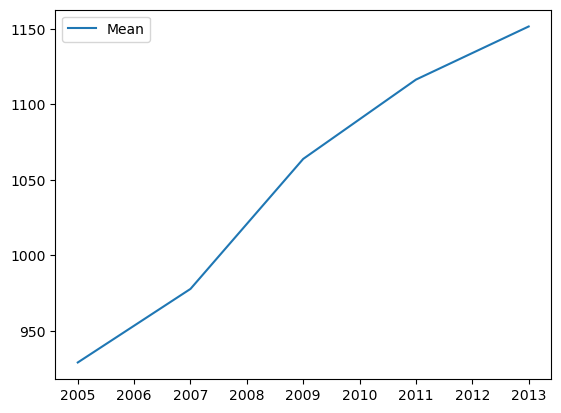

In [61]:
df = pd.DataFrame({
   'Mean': [929.04, 977.77, 1063.87, 1116.38, 1151.57]
   }, index=[2005, 2007, 2009, 2011, 2013])
lines = df.plot.line()

In [62]:
# We are running the paired t-test
FMR_a2[['FMR_2005','FMR_2007']].describe()

,FMR_2005,FMR_2007
count,26373.000000,26373.000000
mean,929.039776,977.769840
std,331.017643,337.055462
min,360.000000,387.000000
25%,686.000000,743.000000
50%,863.000000,908.000000
75%,1076.000000,1137.000000
max,3464.000000,3400.000000


In [63]:
from scipy import stats

print("2005 vs 2007")
stats.ttest_rel(FMR_a2['FMR_2007'], FMR_a2['FMR_2005'])

2005 vs 2007


Ttest_relResult(statistic=69.49039888284894, pvalue=0.0)

In [64]:
FMR_a2[['FMR_2007','FMR_2009']].describe()

,FMR_2007,FMR_2009
count,26373.000000,26373.000000
mean,977.769840,1063.865999
std,337.055462,367.363366
min,387.000000,427.000000
25%,743.000000,799.000000
50%,908.000000,983.000000
75%,1137.000000,1234.000000
max,3400.000000,3501.000000


In [65]:
from scipy import stats
print("2007 vs 2009")
stats.ttest_rel(FMR_a2['FMR_2009'], FMR_a2['FMR_2007'])

2007 vs 2009


Ttest_relResult(statistic=124.3221661902858, pvalue=0.0)

In [66]:
FMR_a2[['FMR_2009','FMR_2011']].describe()

,FMR_2009,FMR_2011
count,26373.000000,26373.000000
mean,1063.865999,1116.381527
std,367.363366,396.703001
min,427.000000,424.000000
25%,799.000000,837.000000
50%,983.000000,1014.000000
75%,1234.000000,1298.000000
max,3501.000000,3586.000000


In [67]:
from scipy import stats
print("2009 vs 2011")
stats.ttest_rel(FMR_a2['FMR_2011'], FMR_a2['FMR_2009'])

2009 vs 2011


Ttest_relResult(statistic=74.15124023938138, pvalue=0.0)

In [68]:
FMR_a2[['FMR_2011','FMR_2013']].describe()

,FMR_2011,FMR_2013
count,26373.000000,26373.000000
mean,1116.381527,1151.569143
std,396.703001,394.262739
min,424.000000,421.000000
25%,837.000000,883.000000
50%,1014.000000,1082.000000
75%,1298.000000,1335.000000
max,3586.000000,3511.000000


In [69]:
from scipy import stats
print("2011 vs 2013")
stats.ttest_rel(FMR_a2['FMR_2013'], FMR_a2['FMR_2011'])

2011 vs 2013


Ttest_relResult(statistic=58.21091561369204, pvalue=0.0)

<a id="2.1"></a> <br>
<h4>The answers of the Questions:</h4>
<b>
Analyze the differences in Market Rents across various years.</b>

The mean FMR increased across the years.

All results remained the same as the Excel version

<a id="3"></a> <br>
<font color='blue'><b><h4>Assignment 3: A Model for Market Value of Single Family Housing Units in year of 2013

<h4><b>Questions:

Q1: Which of these two histograms more closely resemble a Bell curve?
    
Q2: A summary report that covers following:
    
    1) The set of variables used in the regression model and a brief justification for their use.
    
    2) The estimated regression model along with explanation of any variable transformations you have done. 
    3) Interpretation of the impact of various variables included in your model.
    
</b></h4>
[Jump to the answers](#3.1)

The original datasets contain `''` in string type variables. In order to avoid the naming issue, we extract `''` using Power Query and upload it as a clean file.

In [70]:
import pandas as pd

thirteen_clean_df = pd.read_csv('../input/clean-files/2013_clean.csv')

In [71]:
thirteen_clean_df.describe()

,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,...,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT
count,64535.000000,64535.000000,64535.000000,64535.000000,64535.000000,64535.000000,64535.000000,64535.000000,64535.000000,64535.000000,...,64535.000000,64535.000000,64535.000000,64535.000000,64535.000000,64535.000000,64535.000000,64535.000000,64535.000000,64535.000000
mean,47.968932,2.227179,2.394406,68109.744309,1164.395181,17712.125436,29511.032076,46207.567630,15986.664229,2.660308,...,481.123050,2.574758,165.983691,2.488990,80.661251,3.770900,324.761274,2.450376,115.830454,2.328922
std,22.869374,1.269460,1.050114,12371.177175,394.119188,4441.564491,7407.012410,10640.616965,7219.688394,1.093778,...,648.790025,3.294774,168.183589,0.713639,75.058303,1.975262,375.384088,3.276692,97.841114,0.726540
min,-9.000000,1.000000,1.000000,38500.000000,394.000000,10257.000000,17057.000000,27307.000000,-6.000000,0.000000,...,-9.000000,-9.000000,0.000000,1.000000,0.000000,1.000000,-9.000000,-9.000000,0.000000,1.000000
25%,35.000000,1.000000,1.000000,60300.000000,888.000000,14449.000000,24050.000000,38150.000000,12019.000000,2.000000,...,155.065135,3.000000,78.760563,2.000000,43.597884,2.000000,136.580770,2.000000,67.620731,2.000000
50%,50.000000,2.000000,2.000000,64600.000000,1100.000000,16829.000000,28053.000000,44605.000000,15452.000000,3.000000,...,308.246798,4.000000,122.699387,3.000000,64.724154,4.000000,240.498939,4.000000,97.930142,2.000000
75%,64.000000,3.000000,3.000000,74008.000000,1390.000000,20011.000000,33334.000000,52086.000000,18612.000000,3.000000,...,596.378735,4.000000,206.979921,3.000000,95.516505,5.000000,398.416412,4.000000,137.769350,3.000000
max,93.000000,5.000000,4.000000,115300.000000,3511.000000,42550.000000,70850.000000,111450.000000,51635.000000,7.000000,...,10336.261090,4.000000,3419.544546,3.000000,1296.983943,7.000000,6057.843858,4.000000,1928.699349,3.000000


In [72]:
thirteen_clean_df.columns

Index(['CONTROL', 'AGE1', 'METRO3', 'REGION', 'LMED', 'FMR', 'L30', 'L50',
       'L80', 'IPOV', 'BEDRMS', 'BUILT', 'STATUS', 'TYPE', 'VALUE', 'VACANCY',
       'TENURE', 'NUNITS', 'ROOMS', 'WEIGHT', 'PER', 'ZINC2', 'ZADEQ', 'ZSMHC',
       'STRUCTURETYPE', 'OWNRENT', 'UTILITY', 'OTHERCOST', 'COST06', 'COST12',
       'COST08', 'COSTMED', 'TOTSAL', 'ASSISTED', 'GLMED', 'GL30', 'GL50',
       'GL80', 'APLMED', 'ABL30', 'ABL50', 'ABL80', 'ABLMED', 'BURDEN',
       'INCRELAMIPCT', 'INCRELAMICAT', 'INCRELPOVPCT', 'INCRELPOVCAT',
       'INCRELFMRPCT', 'INCRELFMRCAT', 'COST06RELAMIPCT', 'COST06RELAMICAT',
       'COST06RELPOVPCT', 'COST06RELPOVCAT', 'COST06RELFMRPCT',
       'COST06RELFMRCAT', 'COST08RELAMIPCT', 'COST08RELAMICAT',
       'COST08RELPOVPCT', 'COST08RELPOVCAT', 'COST08RELFMRPCT',
       'COST08RELFMRCAT', 'COST12RELAMIPCT', 'COST12RELAMICAT',
       'COST12RELPOVPCT', 'COST12RELPOVCAT', 'COST12RELFMRPCT',
       'COST12RELFMRCAT', 'COSTMedRELAMIPCT', 'COSTMedRELAMICAT',
      

In [73]:
thirteen_a3 = thirteen_clean_df[(thirteen_clean_df['VALUE'] >= 1000)]

In [74]:
thirteen_a3 = thirteen_a3[(thirteen_a3['TYPE'] ==1)]

In [75]:
thirteen_a3 = thirteen_a3[(thirteen_a3['STRUCTURETYPE'] ==1)]

In [76]:
thirteen_a3 = thirteen_a3[(thirteen_a3['AGE1'] >=0)]

In [77]:
print(thirteen_a3)

              CONTROL  AGE1  METRO3  REGION   LMED   FMR    L30    L50    L80  \
0      '100003130103'    82       3       1  73738   956  15738  26213  40322   
1      '100006110249'    50       5       3  55846  1100  17165  28604  45744   
2      '100006370140'    53       5       3  55846  1100  13750  22897  36614   
3      '100006520140'    67       5       3  55846   949  13750  22897  36614   
6      '100007540148'    50       1       3  60991   988  16646  27713  44340   
...               ...   ...     ...     ...    ...   ...    ...    ...    ...   
64509  '999900056714'    62       1       1  89526  1256  21690  36144  51818   
64511  '999900056716'    50       2       1  79200   929  16650  27750  44350   
64512  '999900056719'    58       2       1  95372  1877  25764  42959  59198   
64514  '999900056749'    84       2       1  86324  1721  21407  35686  52086   
64521  '999900056763'    32       4       3  49074   873  10666  17755  28401   

        IPOV  ...      FMTI

In [78]:
thirteen_a3.columns

Index(['CONTROL', 'AGE1', 'METRO3', 'REGION', 'LMED', 'FMR', 'L30', 'L50',
       'L80', 'IPOV', 'BEDRMS', 'BUILT', 'STATUS', 'TYPE', 'VALUE', 'VACANCY',
       'TENURE', 'NUNITS', 'ROOMS', 'WEIGHT', 'PER', 'ZINC2', 'ZADEQ', 'ZSMHC',
       'STRUCTURETYPE', 'OWNRENT', 'UTILITY', 'OTHERCOST', 'COST06', 'COST12',
       'COST08', 'COSTMED', 'TOTSAL', 'ASSISTED', 'GLMED', 'GL30', 'GL50',
       'GL80', 'APLMED', 'ABL30', 'ABL50', 'ABL80', 'ABLMED', 'BURDEN',
       'INCRELAMIPCT', 'INCRELAMICAT', 'INCRELPOVPCT', 'INCRELPOVCAT',
       'INCRELFMRPCT', 'INCRELFMRCAT', 'COST06RELAMIPCT', 'COST06RELAMICAT',
       'COST06RELPOVPCT', 'COST06RELPOVCAT', 'COST06RELFMRPCT',
       'COST06RELFMRCAT', 'COST08RELAMIPCT', 'COST08RELAMICAT',
       'COST08RELPOVPCT', 'COST08RELPOVCAT', 'COST08RELFMRPCT',
       'COST08RELFMRCAT', 'COST12RELAMIPCT', 'COST12RELAMICAT',
       'COST12RELPOVPCT', 'COST12RELPOVCAT', 'COST12RELFMRPCT',
       'COST12RELFMRCAT', 'COSTMedRELAMIPCT', 'COSTMedRELAMICAT',
      

In [79]:
thirteen_a3 = pd.get_dummies(thirteen_a3, columns=['REGION'], prefix="REGION", drop_first=True)

In [80]:
thirteen_a3 = pd.get_dummies(thirteen_a3, columns=['METRO3'], prefix="METRO3")

In [81]:
print(thirteen_a3)

              CONTROL  AGE1   LMED   FMR    L30    L50    L80   IPOV  BEDRMS  \
0      '100003130103'    82  73738   956  15738  26213  40322  11067       2   
1      '100006110249'    50  55846  1100  17165  28604  45744  24218       4   
2      '100006370140'    53  55846  1100  13750  22897  36614  15470       4   
3      '100006520140'    67  55846   949  13750  22897  36614  13964       3   
6      '100007540148'    50  60991   988  16646  27713  44340  18050       3   
...               ...   ...    ...   ...    ...    ...    ...    ...     ...   
64509  '999900056714'    62  89526  1256  21690  36144  51818  15492       2   
64511  '999900056716'    50  79200   929  16650  27750  44350  12019       1   
64512  '999900056719'    58  95372  1877  25764  42959  59198  18097       3   
64514  '999900056749'    84  86324  1721  21407  35686  52086  14007       3   
64521  '999900056763'    32  49074   873  10666  17755  28401  12005       3   

       BUILT  ...  FMTREGION  FMTSTATUS

In [82]:
thirteen_a3.rename(columns = {'REGION_2':'REGION_Midwest'}, inplace = True)
thirteen_a3.rename(columns = {'REGION_3':'REGION_South'}, inplace = True)
thirteen_a3.rename(columns = {'REGION_4':'REGION_West'}, inplace = True)

In [83]:
thirteen_a3.rename(columns = {'METRO3_1':'METRO'}, inplace = True)

In [84]:
thirteen_a3.columns

Index(['CONTROL', 'AGE1', 'LMED', 'FMR', 'L30', 'L50', 'L80', 'IPOV', 'BEDRMS',
       'BUILT',
       ...
       'FMTREGION', 'FMTSTATUS', 'REGION_Midwest', 'REGION_South',
       'REGION_West', 'METRO', 'METRO3_2', 'METRO3_3', 'METRO3_4', 'METRO3_5'],
      dtype='object', length=105)

In [85]:
thirteen_a3.describe()

,AGE1,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,...,COSTMedRELFMRPCT,COSTMedRELFMRCAT,REGION_Midwest,REGION_South,REGION_West,METRO,METRO3_2,METRO3_3,METRO3_4,METRO3_5
count,31785.000000,31785.000000,31785.000000,31785.000000,31785.000000,31785.000000,31785.000000,31785.000000,31785.000000,31785.0,...,31785.000000,31785.000000,31785.000000,31785.000000,31785.000000,31785.000000,31785.000000,31785.000000,31785.000000,31785.000000
mean,55.673211,68197.665345,1280.000000,18090.324493,30141.728362,47145.027057,17747.189932,3.256882,1967.615982,1.0,...,139.676263,2.579456,0.294919,0.301778,0.160485,0.218468,0.434293,0.152179,0.062671,0.132389
std,15.535913,12507.661860,396.690467,4513.833008,7527.366203,10643.446622,5982.362691,0.844646,26.658249,0.0,...,105.229678,0.588654,0.456014,0.459036,0.367061,0.413213,0.495672,0.359200,0.242374,0.338919
min,14.000000,38500.000000,481.000000,10257.000000,17057.000000,27307.000000,11057.000000,0.000000,1919.000000,1.0,...,6.763874,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,60060.000000,1004.000000,14801.000000,24650.000000,39293.000000,13948.000000,3.000000,1950.000000,1.0,...,84.522984,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,64810.000000,1204.000000,17229.000000,28700.000000,45450.000000,15492.000000,3.000000,1970.000000,1.0,...,117.410751,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,66.000000,74008.000000,1445.000000,20600.000000,34400.000000,53000.000000,23401.000000,4.000000,1990.000000,1.0,...,163.793442,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,93.000000,115300.000000,3511.000000,42550.000000,70850.000000,111450.000000,51635.000000,7.000000,2013.000000,1.0,...,1928.699349,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
import pandas
from sklearn import linear_model
import statsmodels.api as sm

thirteen_y = thirteen_a3.VALUE
thirteen_features= ['REGION_Midwest','REGION_South','REGION_West','METRO','FMR', 'LMED', 'BUILT','BEDRMS', 'ROOMS', 'ZINC2', 'ZSMHC', 'UTILITY', 'OTHERCOST', 'COSTMED']
thirteen_X = thirteen_a3[thirteen_features]


#fit linear regression model
thirteen_model = sm.OLS(thirteen_y, thirteen_X).fit()

#view model summary
print(thirteen_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  VALUE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.926e+22
Date:                Sat, 01 Apr 2023   Prob (F-statistic):                        0.00
Time:                        07:39:16   Log-Likelihood:                      2.6348e+05
No. Observations:               31785   AIC:                                 -5.269e+05
Df Residuals:                   31771   BIC:                                 -5.268e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

array([[<AxesSubplot:title={'center':'VALUE'}>]], dtype=object)

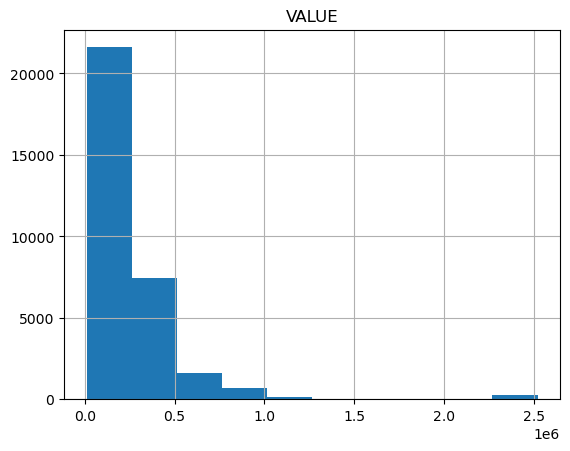

In [87]:
thirteen_a3.hist(column='VALUE')

Some of the numbers don't look correct to me, let's try to transfrom some variables to natural logarithms

In [88]:
# Calculate natural logarithm on
# 'FMR' ,'LMED' and 'COSTMED' column, as well as Y - 'VALUE'
thirteen_a3['FMR'] = np.log(thirteen_a3['FMR'])
thirteen_a3['LMED'] = np.log(thirteen_a3['LMED'])
thirteen_a3['COSTMED'] = np.log(thirteen_a3['COSTMED'])
thirteen_a3['VALUE'] = np.log(thirteen_a3['VALUE'])



In [89]:
print(thirteen_a3)

              CONTROL  AGE1       LMED       FMR    L30    L50    L80   IPOV  \
0      '100003130103'    82  11.208274  6.862758  15738  26213  40322  11067   
1      '100006110249'    50  10.930353  7.003065  17165  28604  45744  24218   
2      '100006370140'    53  10.930353  7.003065  13750  22897  36614  15470   
3      '100006520140'    67  10.930353  6.855409  13750  22897  36614  13964   
6      '100007540148'    50  11.018482  6.895683  16646  27713  44340  18050   
...               ...   ...        ...       ...    ...    ...    ...    ...   
64509  '999900056714'    62  11.402284  7.135687  21690  36144  51818  15492   
64511  '999900056716'    50  11.279732  6.834109  16650  27750  44350  12019   
64512  '999900056719'    58  11.465540  7.537430  25764  42959  59198  18097   
64514  '999900056749'    84  11.365863  7.450661  21407  35686  52086  14007   
64521  '999900056763'    32  10.801085  6.771936  10666  17755  28401  12005   

       BEDRMS  BUILT  ...  FMTREGION  F

In [90]:
# Run the regression again
import pandas
from sklearn import linear_model
import statsmodels.api as sm

thirteen_y = thirteen_a3.VALUE
thirteen_features= ['REGION_Midwest','REGION_South','REGION_West','METRO','FMR', 'LMED', 'BUILT','BEDRMS', 'ROOMS', 'ZINC2', 'ZSMHC', 'UTILITY', 'OTHERCOST', 'COSTMED']
thirteen_X = thirteen_a3[thirteen_features]


#fit linear regression model
thirteen_model = sm.OLS(thirteen_y, thirteen_X).fit()

#view model summary
print(thirteen_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  VALUE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.205e+07
Date:                Sat, 01 Apr 2023   Prob (F-statistic):                        0.00
Time:                        07:39:17   Log-Likelihood:                          21434.
No. Observations:               31785   AIC:                                 -4.284e+04
Df Residuals:                   31771   BIC:                                 -4.272e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

array([[<AxesSubplot:title={'center':'VALUE'}>]], dtype=object)

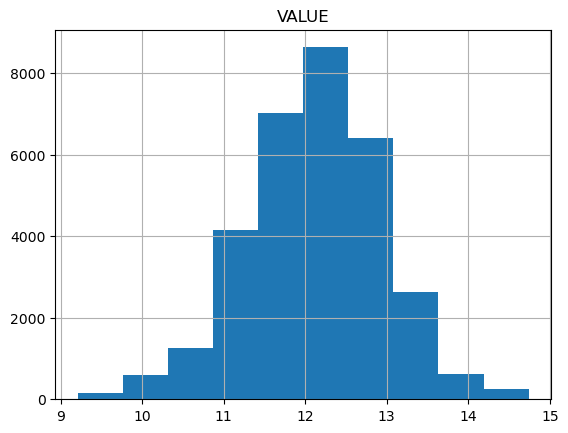

In [91]:
thirteen_a3.hist(column='VALUE')

<a id="3.1"></a> <br>
<h4>The answers of the Questions:</h4>
<b>
Q1: Which of these two histograms more closely resemble a Bell curve?</b>


The histogram of `Ln(Value)` is more closely resemble a Bell curve.




<b>Q2: A summary report that covers following:</b>

<b>1. The set of variables used in the regression model and a brief justification for their use. </b>


We choose `METRO3`, `REGION`, `FMR`, `LMED`, `BUILD`,`BEDRMS`, `ROOMS`, `ZINC2`, `ZSMHC`, `UTILITY`, `OTHERCOST`, `COSTMED` as X variables. 


<b>2. The estimated regression model along with explanation of any variable transformations have done:</b>


`METRO3` is dummy variable, set “1” as 1, discard anothers; 


`REGION` was set as categorical variable, Midwest, South andWest are dummy variables, Northeast is reference; 


`FMR`, `LMED`, `COSTMED` was transformed to Natural logarithms; 


`BUILD`, `BEDRMS`, `ROOMS`, `ZINC2`, `ZSMHC`, `UTILITY` and `OTHERCOST` are remained the same. We considered to transform some cost variables (e.g.:`ZINC2`, `ZSMHC`, `UTILITY`), but they contained “0” value, we tried not to decrease the amount of observations.


<b>3. Interpretation of the impact of various variables included in the model</b>

β1: When the house unit is located in the Midwest region, the house value is lower by 1.22% as compared to a similar house unit in the Northeast region, all other variables being kept at the same level.

β2: When the house unit is located in the South region, the house value is higher by 0.13% as compared to a similar house unit in the Northeast region, all other variables being kept at the same level.

β3: When the house unit is located in the West region, the house value is 0.43% lower as compared to a similar house unit in the Northeast region, all other variables being kept at the same level.

β4: When the house is located in the central city area, the house value is lower by 0.94%, all other variables being kept at the same level.

β5: Every percentage increase in the fair market rent, the house value is lower by 8.08%, all other variables being kept at the same level.

β6: Every percentage increase in the area median income, the house value is higher by 13.89%, all other variables being kept at the same level.

β7: Every one-year after the house was built, the house value is higher by 0.09%, all other variables being kept at the same level.

β8: Every one more bedroom is built in the unit, the house value is higher by 1.25%, all other variables being kept at the same level.

β9: Every one more room is built in the unit, the house value decreased by 0.28%, all other variables being kept at the same level.

β10, β11 need to be transformed.(Placeholder here)

β12: Every one 1 dollars of monthly utilities cost increases, the house value decreases by 0.09%, all other variables being kept at the same level.

β13: Every one 1 dollars of other monthly costs increases, the house value decreases by 0.07%, all other variables being kept at the same level.

β10: Every one percentage of monthly mortgage payment assuming median interest increases, the house value was increased by 132.86%, all other variables being kept at the same level.



<a id="4"></a> <br>
<font color='blue'><b><h4>Assignment 4: Building a Predictive Model for Market Value of Housing Units: Using the regression model to predict market value two years (2013 and 2011)
    

We use the `VALUE` variable from 2013 data and `X `variables from 2011 data. From the data that we create, select 1000 Housing Units at random. This is our ‘Holdout Sample’.

Using `‘β’` coefficients from regression model and `X` variables from ‘Holdout Sample’, predict `VALUE` for each Housing Unit in the Holdout Sample.
    

<h4><b>Questions:

Q1: How well does the model predict future Market values? Provide R-square measure.
    
Q2: Compare these thousand predictions with the actual market value of those housing units, provide calculation of ‘Mean Absolute Deviation’.
  
    
</b></h4>
[Jump to the answers](#4.1)


The original datasets contain `''` in string type variables. In order to avoid the naming issue, we extract `''` using Power Query and upload it as a clean file.

In [92]:
import pandas as pd

eleven_clean_df = pd.read_csv('../input/clean-files/2011_clean.csv')

In [93]:
thirteen_clean_df.columns   #show the 2013 columns

Index(['CONTROL', 'AGE1', 'METRO3', 'REGION', 'LMED', 'FMR', 'L30', 'L50',
       'L80', 'IPOV', 'BEDRMS', 'BUILT', 'STATUS', 'TYPE', 'VALUE', 'VACANCY',
       'TENURE', 'NUNITS', 'ROOMS', 'WEIGHT', 'PER', 'ZINC2', 'ZADEQ', 'ZSMHC',
       'STRUCTURETYPE', 'OWNRENT', 'UTILITY', 'OTHERCOST', 'COST06', 'COST12',
       'COST08', 'COSTMED', 'TOTSAL', 'ASSISTED', 'GLMED', 'GL30', 'GL50',
       'GL80', 'APLMED', 'ABL30', 'ABL50', 'ABL80', 'ABLMED', 'BURDEN',
       'INCRELAMIPCT', 'INCRELAMICAT', 'INCRELPOVPCT', 'INCRELPOVCAT',
       'INCRELFMRPCT', 'INCRELFMRCAT', 'COST06RELAMIPCT', 'COST06RELAMICAT',
       'COST06RELPOVPCT', 'COST06RELPOVCAT', 'COST06RELFMRPCT',
       'COST06RELFMRCAT', 'COST08RELAMIPCT', 'COST08RELAMICAT',
       'COST08RELPOVPCT', 'COST08RELPOVCAT', 'COST08RELFMRPCT',
       'COST08RELFMRCAT', 'COST12RELAMIPCT', 'COST12RELAMICAT',
       'COST12RELPOVPCT', 'COST12RELPOVCAT', 'COST12RELFMRPCT',
       'COST12RELFMRCAT', 'COSTMedRELAMIPCT', 'COSTMedRELAMICAT',
      

In [94]:
eleven_clean_df.columns

Index(['CONTROL', 'AGE1', 'METRO3', 'REGION', 'LMED', 'FMR', 'L30', 'L50',
       'L80', 'IPOV', 'PER', 'ZINC2', 'ZADEQ', 'ZSMHC', 'STATUS', 'WEIGHT',
       'BEDRMS', 'BUILT', 'TYPE', 'VALUE', 'VACANCY', 'TENURE', 'NUNITS',
       'ROOMS', 'STRUCTURETYPE', 'OWNRENT', 'UTILITY', 'OTHERCOST', 'COST06',
       'COST12', 'COST08', 'COSTMED', 'TOTSAL', 'ASSISTED', 'GLMED', 'GL30',
       'GL50', 'GL80', 'APLMED', 'ABL30', 'ABL50', 'ABL80', 'ABLMED', 'BURDEN',
       'INCRELAMIPCT', 'INCRELAMICAT', 'INCRELPOVPCT', 'INCRELPOVCAT',
       'INCRELFMRPCT', 'INCRELFMRCAT', 'COST06RELAMIPCT', 'COST06RELAMICAT',
       'COST06RELPOVPCT', 'COST06RELPOVCAT', 'COST06RELFMRPCT',
       'COST06RELFMRCAT', 'COST08RELAMIPCT', 'COST08RELAMICAT',
       'COST08RELPOVPCT', 'COST08RELPOVCAT', 'COST08RELFMRPCT',
       'COST08RELFMRCAT', 'COST12RELAMIPCT', 'COST12RELAMICAT',
       'COST12RELPOVPCT', 'COST12RELPOVCAT', 'COST12RELFMRPCT',
       'COST12RELFMRCAT', 'COSTMedRELAMIPCT', 'COSTMedRELAMICAT',
      

In [95]:
# Filter columns
eleven_holdout = eleven_clean_df[['CONTROL','VALUE','METRO3','REGION','LMED', 'FMR','BEDRMS', 'ROOMS', 'AGE1', 'BUILT','COSTMED','STRUCTURETYPE','TYPE', 'OWNRENT']]
thirteen_holdout = thirteen_clean_df[['CONTROL','VALUE']]  # Later, we will only use VALUE for 2013, 2011 is just a reference

In [96]:
holdout_a4 = pd.merge(eleven_holdout, thirteen_holdout, on= "CONTROL", how= "inner")

In [97]:
print(holdout_a4)

              CONTROL  VALUE_x  METRO3  REGION   LMED   FMR  BEDRMS  ROOMS  \
0      '100003130103'   200000       3       1  75030  1152       3      5   
1      '100006110249'   125000       5       3  55770  1003       4      8   
2      '100006520140'   250000       5       3  55770   895       3      5   
3      '100007130148'       -6       1       3  62084   711       2      4   
4      '100007390148'       -6       2       3  63499   673       1      3   
...               ...      ...     ...     ...    ...   ...     ...    ...   
46376  '999900022228'       -6       1       1  64200  1403       2      5   
46377  '999900022229'       -6       1       3  69100   891       2      5   
46378  '999900022231'   350000       3       4  67985  1615       3      6   
46379  '999900022232'       -6       4       2  61959   663       2      4   
46380  '999900022233'       -6       1       4  75202  1052       2      4   

       AGE1  BUILT      COSTMED  STRUCTURETYPE  TYPE  OWNRENT  

In [98]:
holdout_a4.rename(columns = {'VALUE_x':'VALUE_2011'}, inplace = True)
holdout_a4.rename(columns = {'VALUE_y':'VALUE_2013'}, inplace = True)

In [99]:
holdout_a4 = holdout_a4[(holdout_a4['STRUCTURETYPE'] == 1)]
holdout_a4 = holdout_a4[(holdout_a4['TYPE'] == 1)]

In [100]:
holdout_a4 = holdout_a4[(holdout_a4['VALUE_2013'] >= 1000)]
holdout_a4 = holdout_a4[(holdout_a4['AGE1'] >= 0)]

In [101]:
holdout_a4 = holdout_a4[(holdout_a4['AGE1'] >= 0)]

In [102]:
holdout_a4 = holdout_a4[(holdout_a4['FMR'] != 0)]
holdout_a4 = holdout_a4[(holdout_a4['LMED'] != 0)]
holdout_a4 = holdout_a4[(holdout_a4['COSTMED'] != 0)]

In [103]:
print(holdout_a4)

              CONTROL  VALUE_2011  METRO3  REGION   LMED   FMR  BEDRMS  ROOMS  \
1      '100006110249'      125000       5       3  55770  1003       4      8   
2      '100006520140'      250000       5       3  55770   895       3      5   
5      '100007540148'      169000       1       3  62084   935       3      6   
7      '100008960141'      140000       5       4  53995  1224       3      7   
9      '100010190149'      225000       5       3  55770   895       3      5   
...               ...         ...     ...     ...    ...   ...     ...    ...   
46302  '999900022045'      240000       1       4  61000   811       2      6   
46307  '999900022051'      140000       1       4  61000  1181       3      8   
46312  '999900022056'      110000       1       4  61000  1416       4      6   
46315  '999900022059'      140000       1       4  61000  1181       3      5   
46358  '999900022182'       44000       3       3  62806   659       1      3   

       AGE1  BUILT      COS

In [104]:
holdout_a4.describe()

,VALUE_2011,METRO3,REGION,LMED,FMR,BEDRMS,ROOMS,AGE1,BUILT,COSTMED,STRUCTURETYPE,TYPE,OWNRENT,VALUE_2013
count,2.259800e+04,22598.000000,22598.000000,22598.000000,22598.000000,22598.000000,22598.000000,22598.000000,22598.000000,22598.000000,22598.0,22598.0,22598.000000,2.259800e+04
mean,2.349423e+05,2.598283,2.602354,66398.401363,1191.704974,3.233029,6.575626,54.988937,1968.693822,1848.192347,1.0,1.0,1.034561,2.471993e+05
std,2.568104e+05,1.351445,0.985911,12013.566403,409.346803,0.839642,1.613029,15.586323,26.514377,1667.970147,0.0,0.0,0.182668,2.685314e+05
min,-6.000000e+00,1.000000,1.000000,33700.000000,419.000000,0.000000,1.000000,15.000000,1919.000000,13.000000,1.0,1.0,1.000000,1.000000e+04
25%,1.000000e+05,2.000000,2.000000,58431.000000,909.000000,3.000000,5.000000,43.000000,1950.000000,961.784999,1.0,1.0,1.000000,1.000000e+05
50%,1.700000e+05,2.000000,3.000000,63506.000000,1077.000000,3.000000,6.000000,54.000000,1970.000000,1411.355831,1.0,1.0,1.000000,1.800000e+05
75%,2.850000e+05,3.000000,3.000000,72393.000000,1363.000000,4.000000,8.000000,66.000000,1995.000000,2171.199996,1.0,1.0,1.000000,3.000000e+05
max,4.414135e+06,5.000000,4.000000,126600.000000,3586.000000,8.000000,14.000000,93.000000,2011.000000,28249.267280,1.0,1.0,2.000000,2.520000e+06


array([[<AxesSubplot:title={'center':'VALUE_2013'}>]], dtype=object)

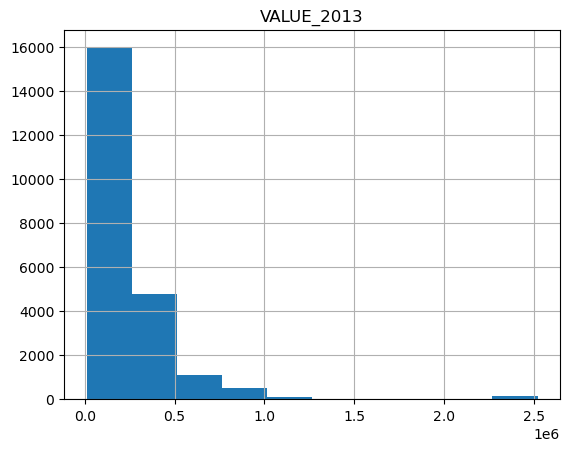

In [105]:
holdout_a4.hist(column='VALUE_2013')

In [106]:
#Create dummy variables
holdout_a4 = pd.get_dummies(holdout_a4, columns=['REGION'], prefix="REGION", drop_first=True)

In [107]:
holdout_a4 = pd.get_dummies(holdout_a4, columns=['METRO3'], prefix="METRO3")

In [108]:
holdout_a4.columns

Index(['CONTROL', 'VALUE_2011', 'LMED', 'FMR', 'BEDRMS', 'ROOMS', 'AGE1',
       'BUILT', 'COSTMED', 'STRUCTURETYPE', 'TYPE', 'OWNRENT', 'VALUE_2013',
       'REGION_2', 'REGION_3', 'REGION_4', 'METRO3_1', 'METRO3_2', 'METRO3_3',
       'METRO3_4', 'METRO3_5'],
      dtype='object')

In [109]:
holdout_a4.rename(columns = {'REGION_2':'REGION_Midwest'}, inplace = True)
holdout_a4.rename(columns = {'REGION_3':'REGION_South'}, inplace = True)
holdout_a4.rename(columns = {'REGION_4':'REGION_West'}, inplace = True)

In [110]:
holdout_a4.rename(columns = {'METRO3_1':'METRO'}, inplace = True)

In [111]:
holdout_a4.columns

Index(['CONTROL', 'VALUE_2011', 'LMED', 'FMR', 'BEDRMS', 'ROOMS', 'AGE1',
       'BUILT', 'COSTMED', 'STRUCTURETYPE', 'TYPE', 'OWNRENT', 'VALUE_2013',
       'REGION_Midwest', 'REGION_South', 'REGION_West', 'METRO', 'METRO3_2',
       'METRO3_3', 'METRO3_4', 'METRO3_5'],
      dtype='object')

In [112]:
# Calculate natural logarithm on
# 'FMR' ,'LMED' and 'COSTMED' column, as well as Y - 'VALUE'
holdout_a4['FMR'] = np.log(holdout_a4['FMR'])
holdout_a4['LMED'] = np.log(holdout_a4['LMED'])
holdout_a4['COSTMED'] = np.log(holdout_a4['COSTMED'])
holdout_a4['VALUE_2013'] = np.log(holdout_a4['VALUE_2013'])


In [113]:
print(holdout_a4)

              CONTROL  VALUE_2011       LMED       FMR  BEDRMS  ROOMS  AGE1  \
1      '100006110249'      125000  10.928991  6.910751       4      8    40   
2      '100006520140'      250000  10.928991  6.796824       3      5    65   
5      '100007540148'      169000  11.036244  6.840547       3      6    48   
7      '100008960141'      140000  10.896647  7.109879       3      7    58   
9      '100010190149'      225000  10.928991  6.796824       3      5    57   
...               ...         ...        ...       ...     ...    ...   ...   
46302  '999900022045'      240000  11.018629  6.698268       2      6    72   
46307  '999900022051'      140000  11.018629  7.074117       3      8    55   
46312  '999900022056'      110000  11.018629  7.255591       4      6    26   
46315  '999900022059'      140000  11.018629  7.074117       3      5    48   
46358  '999900022182'       44000  11.047806  6.490724       1      3    49   

       BUILT   COSTMED  STRUCTURETYPE  ...  OWNRENT

array([[<AxesSubplot:title={'center':'VALUE_2013'}>]], dtype=object)

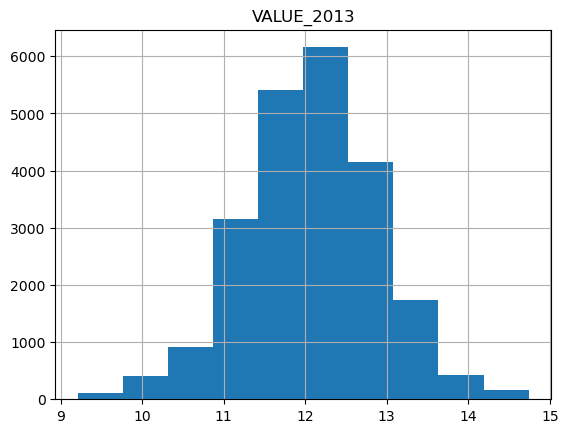

In [114]:
holdout_a4.hist(column='VALUE_2013')

In [115]:
# Run the regression
import pandas
from sklearn import linear_model
import statsmodels.api as sm

holdout_y = holdout_a4.VALUE_2013
holdout_features= ['METRO','REGION_Midwest','REGION_South','REGION_West','LMED', 'FMR','BEDRMS', 'ROOMS', 'AGE1', 'BUILT','COSTMED']
holdout_X = holdout_a4[holdout_features]


#fit linear regression model
holdout_model = sm.OLS(holdout_y, holdout_X).fit()

#view model summary
print(holdout_model.summary())

                                 OLS Regression Results                                
Dep. Variable:             VALUE_2013   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.078e+06
Date:                Sat, 01 Apr 2023   Prob (F-statistic):                        0.00
Time:                        07:39:22   Log-Likelihood:                         -17637.
No. Observations:               22598   AIC:                                  3.530e+04
Df Residuals:                   22587   BIC:                                  3.538e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [116]:
holdout_sample = holdout_a4.sample(n=1000, replace=True, random_state=1)

In [117]:
holdout_sample.describe()

,VALUE_2011,LMED,FMR,BEDRMS,ROOMS,AGE1,BUILT,COSTMED,STRUCTURETYPE,TYPE,OWNRENT,VALUE_2013,REGION_Midwest,REGION_South,REGION_West,METRO,METRO3_2,METRO3_3,METRO3_4,METRO3_5
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.401671e+05,11.084261,7.028008,3.267000,6.63200,55.146000,1969.286000,7.302293,1.0,1.0,1.030000,12.083262,0.269000,0.37800,0.194000,0.213000,0.403000,0.135000,0.075000,0.174000
std,2.759093e+05,0.167055,0.305964,0.836906,1.62395,15.418833,26.264044,0.655117,0.0,0.0,0.170673,0.803082,0.443662,0.48513,0.395627,0.409633,0.490746,0.341895,0.263523,0.379299
min,-6.000000e+00,10.623763,6.263398,1.000000,3.00000,19.000000,1919.000000,4.828314,1.0,1.0,1.000000,9.210340,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+05,10.977568,6.822196,3.000000,5.75000,44.000000,1950.000000,6.868620,1.0,1.0,1.000000,11.512925,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.650000e+05,11.058779,6.990257,3.000000,6.00000,55.000000,1970.000000,7.235582,1.0,1.0,1.000000,12.100712,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000e+05,11.188579,7.206738,4.000000,8.00000,65.000000,1995.000000,7.714976,1.0,1.0,1.000000,12.611538,1.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,3.000000e+06,11.572137,7.951911,6.000000,13.00000,93.000000,2010.000000,9.870637,1.0,1.0,2.000000,14.739769,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
# Run the regression
import pandas
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.api import add_constant

holdout_sample_y = holdout_sample.VALUE_2013
holdout_sample_features= ['METRO','REGION_Midwest','REGION_South','REGION_West','LMED', 'FMR','BEDRMS', 'ROOMS', 'AGE1', 'BUILT','COSTMED']
holdout_sample_X = holdout_sample[holdout_sample_features]


#fit linear regression model
holdout_sample_model = sm.OLS(holdout_sample_y, holdout_sample_X).fit()

#view model summary
print(holdout_sample_model.summary())

                                 OLS Regression Results                                
Dep. Variable:             VALUE_2013   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          5.246e+04
Date:                Sat, 01 Apr 2023   Prob (F-statistic):                        0.00
Time:                        07:39:22   Log-Likelihood:                         -727.58
No. Observations:                1000   AIC:                                      1477.
Df Residuals:                     989   BIC:                                      1531.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

We want to see how well does the model (the 1000 random samples) predict future Market values?

In this case, the calculation should be: -2.814186543+ METRO * (-0.0672) + REGION_Midwest * (-0.0489) + REGION_South * (-0.0778) + REGION_West * 0.0931 + LMED * 0.0595 + FMR * 0.4256 + BEDRMS * (-0.0573) + ROOMS * 0.0663 + AGE1 * (-0.0002) + BUILT * 0.0017 + COSTMED * 0.6643

In [119]:
holdout_sample_X_mean = holdout_sample_X.mean()
print(holdout_sample_X_mean)

METRO                0.213000
REGION_Midwest       0.269000
REGION_South         0.378000
REGION_West          0.194000
LMED                11.084261
FMR                  7.028008
BEDRMS               3.267000
ROOMS                6.632000
AGE1                55.146000
BUILT             1969.286000
COSTMED              7.302293
dtype: float64


In [120]:
# Calculate the predict values
holdout_sample["holdout_predict_ln"] = -2.814186543+ (holdout_sample["METRO"] * (-0.0672) + holdout_sample["REGION_Midwest"] * (-0.0489) + holdout_sample["REGION_South"] * (-0.0778) + holdout_sample["REGION_West"] * 0.0931 + holdout_sample["LMED"] * 0.0595 + holdout_sample["FMR"] * 0.4256 + holdout_sample["BEDRMS"] * (-0.0573) + holdout_sample["ROOMS"] * 0.0663 + holdout_sample["AGE1"] * (-0.0002) + holdout_sample["BUILT"] * 0.0017 + holdout_sample["COSTMED"] * 0.6643)

In [121]:
# Transfrom back to exp
holdout_sample["holdout_predict_exp"] = np.exp(holdout_sample["holdout_predict_ln"])

In [122]:
# Mean of predict exp value
holdout_predict_exp_mean = holdout_sample["holdout_predict_exp"].mean()
print(holdout_predict_exp_mean)

12420.684920341502


In [123]:
#remember to transform VALUE_2013 back to exp
holdout_sample["VALUE_2013_exp"] = np.exp(holdout_sample["VALUE_2013"])

In [124]:
holdout_sample_value_mean = holdout_sample["VALUE_2013_exp"].mean()
holdout_sample_value_mean
print(holdout_sample_value_mean)

248910.0


In [125]:
# Mean Absolute Deviation
holdout_abs = abs(holdout_sample_value_mean - holdout_predict_exp_mean)
print("The Mean Absolute Deviation is: ", holdout_abs)

The Mean Absolute Deviation is:  236489.3150796585


<a id="4.1"></a> <br>
<h4><b>Summary:</h4></b>
1. We merge data between 2013 and 2011 again in order to get the most samples of the housing units. We used the Y value of 2013, and X variables in 2011.

2. After data cleaning, we have 22587 rows of data, then we use a random and get 1000 samples of housing units.

3. We transferred LMED, FMR and COSTMED variables to Natural logarithms, a slightly different than the assignment 3.

4. We have the predicted market value and calculate the Mean Absolute Deviation (MAD) for our predictions.


<h4><b>To answer the questions:</h4></b>

<b>Q1: How well does the model predict future Market values? Provide R-square measure.</b>

The regression model now has a R-square of 0.99 (need to double check)

    
<b>Q2: Compare these thousand predictions with the actual market value of those housing units, provide calculation of ‘Mean Absolute Deviation’.</b>

The Mean Absolute Deviation is $236489. This seems ok given that the average Market Value is around 248910.


<a id="5"></a> <br>
<font color='blue'><b><h4>Assignment 5: Building a Predictive Model for Market Value of Housing Units: Using the `Machine Learning` regression model to predict market value for 2015.
    

placeholder